## BluePrinty Case Study

### BluePrinty Data

In [1]:
import pandas as pd

df_bp = pd.read_csv('blueprinty.csv')
df_bp

,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0
...,...,...,...,...
1495,2,Northeast,18.5,1
1496,3,Southwest,22.5,0
1497,4,Southwest,17.0,0
1498,3,South,29.0,0


In [2]:
unique_rows = df_bp.copy()
unique_rows = unique_rows.drop_duplicates()
unique_rows.shape

(1145, 4)

In [3]:
num_duplicates = df_bp.shape[0] - unique_rows.shape[0]
num_duplicates

355

In [4]:
print(df_bp.dtypes)

patents         int64
region         object
age           float64
iscustomer      int64
dtype: object


In [5]:
df_bp.describe()

,patents,age,iscustomer
count,1500.000000,1500.000000,1500.000000
mean,3.684667,26.357667,0.320667
std,2.352500,7.242528,0.466889
min,0.000000,9.000000,0.000000
25%,2.000000,21.000000,0.000000
50%,3.000000,26.000000,0.000000
75%,5.000000,31.625000,1.000000
max,16.000000,49.000000,1.000000


Compare histograms and means of number of patents by customer status

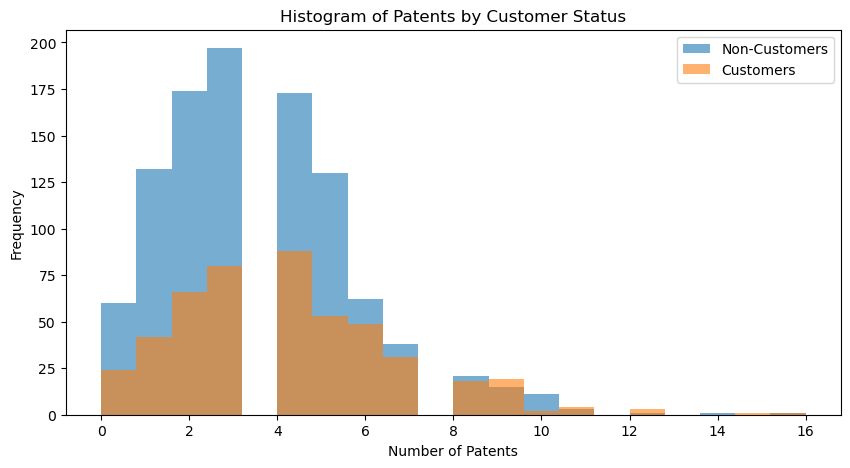

Mean number of patents (Customers): 4.13
Mean number of patents (Non-Customers): 3.47


In [6]:
#Compare histograms and means of number of patents by customer status

import matplotlib.pyplot as plt

# Clean column names if needed
df_bp.columns = df_bp.columns.str.strip().str.lower().str.replace('#', '').str.replace(' ', '_')

# Separate data
customers = df_bp[df_bp['iscustomer'] == 1]
non_customers = df_bp[df_bp['iscustomer'] == 0]

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(non_customers['patents'], bins=20, alpha=0.6, label='Non-Customers')
plt.hist(customers['patents'], bins=20, alpha=0.6, label='Customers')
plt.xlabel("Number of Patents")
plt.ylabel("Frequency")
plt.title("Histogram of Patents by Customer Status")
plt.legend()
plt.show()

# Compare means
mean_customers = customers['patents'].mean()
mean_non_customers = non_customers['patents'].mean()

print(f"Mean number of patents (Customers): {mean_customers:.2f}")
print(f"Mean number of patents (Non-Customers): {mean_non_customers:.2f}")




In [7]:
total_customers = df_bp[df_bp['iscustomer'] == 1].shape[0]
total_non_customers = df_bp[df_bp['iscustomer'] == 0].shape[0]

print(f"Total Customers: {total_customers}")
print(f"Total Non-Customers: {total_non_customers}")

Total Customers: 481
Total Non-Customers: 1019


### Compare regions and age by customer status

In [8]:
df_bp.columns

Index(['patents', 'region', 'age', 'iscustomer'], dtype='object')

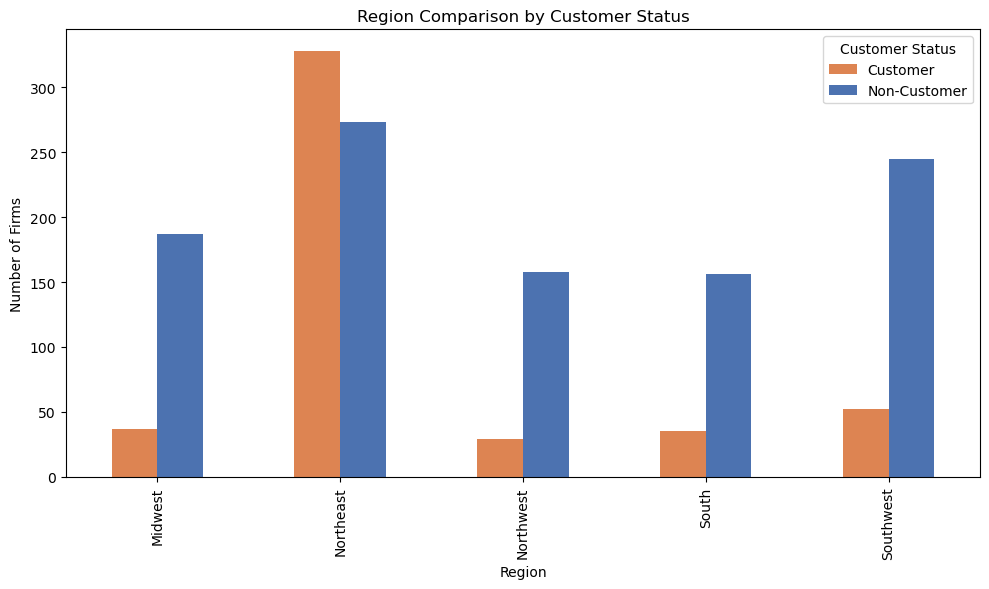

In [9]:
# Group data by region and customer status
df_bp['customer_status'] = df_bp['iscustomer'].map({0: 'Non-Customer', 1: 'Customer'})
region_comparison = df_bp.groupby(['region', 'customer_status']).size().unstack()

# Plot grouped bar chart
region_comparison.plot(kind='bar', figsize=(10, 6), color=['#DD8452', '#4C72B0'])
plt.title("Region Comparison by Customer Status")
plt.xlabel("Region")
plt.ylabel("Number of Firms")
plt.legend(title="Customer Status")
plt.tight_layout()
plt.show()

/tmp/ipykernel_69858/4202040372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bp, x="customer_status", y="age", palette =['#4C72B0', '#DD8452'])


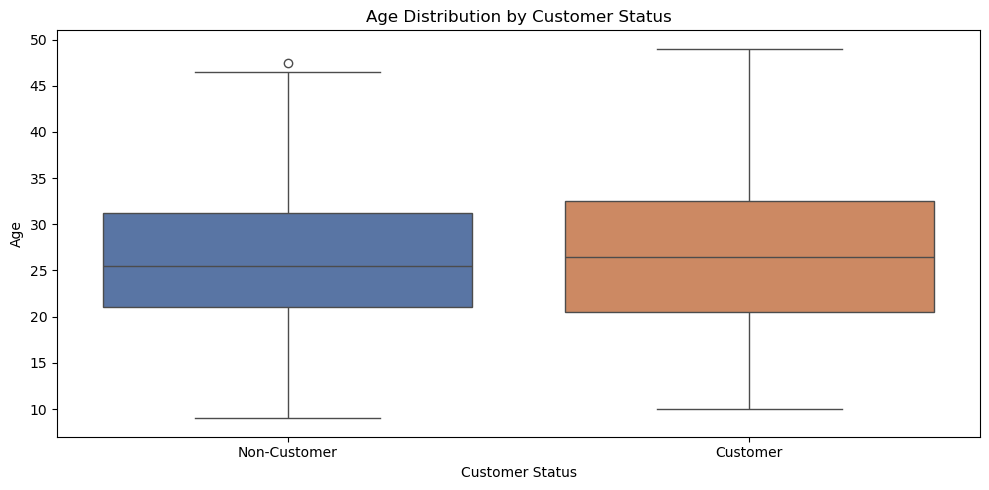

In [10]:
# Plot boxplot to compare age by customer status
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_bp, x="customer_status", y="age", palette =['#4C72B0', '#DD8452'])
plt.title("Age Distribution by Customer Status")
plt.xlabel("Customer Status")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

In [11]:
df_bp.groupby("iscustomer")["age"].mean()


iscustomer
0    26.101570
1    26.900208
Name: age, dtype: float64

### Estimation of Simple Poisson Model

In [12]:
import numpy as np
from scipy.special import gammaln 

# Likelihood function
def poisson_likelihood(lam, Y):
    if lam <= 0:
        return 0.0  # Likelihood is zero for non-positive lambda
    return np.prod((np.exp(-lam) * lam**Y) / np.exp(gammaln(Y + 1)))

# Log-likelihood function (numerically stable)
def poisson_log_likelihood(lam, Y):
    if lam <= 0:
        return -np.inf  # Log-likelihood is undefined for non-positive lambda
    return np.sum(Y * np.log(lam) - lam - gammaln(Y + 1))

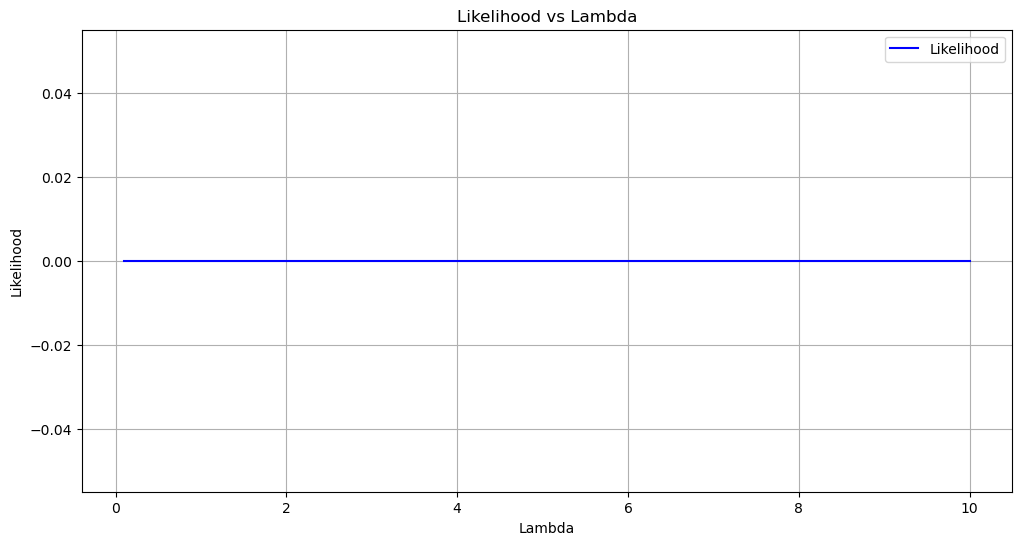

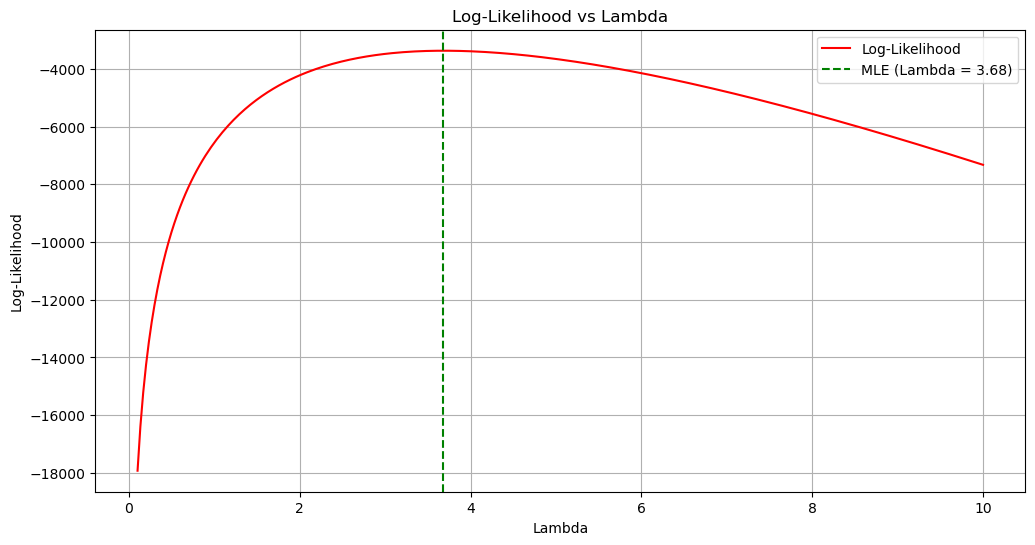

Maximum Likelihood Estimate (MLE) for Lambda: 3.68


In [13]:
# Define the observed number of patents as input for Y
Y = df_bp['patents'].values

# Define a range of lambda values
lambda_values = np.linspace(0.1, 10, 300)

# Calculate likelihood and log-likelihood for each lambda
likelihoods = [poisson_likelihood(lam, Y) for lam in lambda_values]
log_likelihoods = [poisson_log_likelihood(lam, Y) for lam in lambda_values]

# Plot the likelihood
plt.figure(figsize=(12, 6))
plt.plot(lambda_values, likelihoods, label="Likelihood", color="blue")
plt.xlabel("Lambda")
plt.ylabel("Likelihood")
plt.title("Likelihood vs Lambda")
plt.grid()
plt.legend()
plt.show()

# Plot the log-likelihood
# Plot the log-likelihood
plt.figure(figsize=(12, 6))
plt.plot(lambda_values, log_likelihoods, label="Log-Likelihood", color="red")

# Find the lambda that maximizes the log-likelihood (MLE)
mle_lambda = lambda_values[np.argmax(log_likelihoods)]
plt.axvline(mle_lambda, color="green", linestyle="--", label=f"MLE (Lambda = {mle_lambda:.2f})")

plt.xlabel("Lambda")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Lambda")
plt.grid()
plt.legend()
plt.show()

# Display the MLE
print(f"Maximum Likelihood Estimate (MLE) for Lambda: {mle_lambda:.2f}")

In [14]:
#Find the MLE by optimizing likelihood function with sp.optimize()
from scipy.optimize import minimize

# Define the negative log-likelihood function
def negative_log_likelihood(lam, Y):
    if lam[0] <= 0:
        return np.inf  # Return infinity for non-positive lambda
    return -poisson_log_likelihood(lam[0], Y)

# Initial guess for lambda
initial_guess = [1.0]

# Perform optimization
result = minimize(negative_log_likelihood, initial_guess, args=(Y,), bounds=[(0.001, None)])

# Extract the MLE for lambda
mle_lambda_optimized = result.x[0]

print(f"Optimized Maximum Likelihood Estimate (MLE) for Lambda: {mle_lambda_optimized:.2f}")



Optimized Maximum Likelihood Estimate (MLE) for Lambda: 3.68


In [15]:
# Log-likelihood function with covariates
def poisson_log_likelihood_with_covariates(beta, X, Y):
    """
    Log-likelihood function for Poisson regression with covariates.
    
    Parameters:
    - beta: Coefficient vector (numpy array).
    - X: Covariate matrix (numpy array).
    - Y: Observed counts (numpy array).
    
    Returns:
    - Log-likelihood value (float).
    """
    # Compute lambda using the inverse link function (exp)
    lambda_ = np.exp(X @ beta)
    # Compute the log-likelihood
    return np.sum(Y * np.log(lambda_) - lambda_ - gammaln(Y + 1))

In [25]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.special import gammaln

df_bp2 = df_bp.copy()

# Create polynomial term for age
df_bp2["agesquared"] = df_bp2["age"] ** 2

# Create dummy variables for region (drop one category to avoid multicollinearity)
region_dummies = pd.get_dummies(df_bp2["region"], drop_first=True)

# Construct the design matrix X with intercept, age, agesquared, region dummies, and customer flag
X = pd.concat([
    pd.Series(1, index=df_bp2.index, name="intercept"),  # intercept term
    df_bp2["age"],
    df_bp2["agesquared"],
    region_dummies,
    df_bp2["iscustomer"]
], axis=1)

# Response variable
Y = df_bp2["patents"].values
X_matrix = X.values

# Define Poisson log-likelihood function
def poisson_loglike(beta, X, Y):
    beta = np.atleast_1d(np.asarray(beta))
    Xb = np.dot(X, beta).astype(np.float64)
    Xb_clipped = np.clip(Xb, a_min=None, a_max=20)  # cap to avoid overflow in exp
    lam = np.exp(Xb_clipped)
    return np.sum(-lam + Y * Xb - gammaln(Y + 1))

# Negative log-likelihood for minimization
def neg_loglike(beta, X, Y):
    return -poisson_loglike(beta, X, Y)

# Initial guess for beta (zeros)
initial_beta = np.zeros(X.shape[1])

# Optimize using BFGS
result = optimize.minimize(neg_loglike, initial_beta, args=(X_matrix, Y), method='BFGS')

# Extract MLE estimates and standard errors
beta_hat = result.x
hessian_inv = result.hess_inv
std_errs = np.sqrt(np.diag(hessian_inv))

# Create summary table
summary = pd.DataFrame({
    "Coefficient": beta_hat,
    "Std. Error": std_errs
}, index=X.columns)

# Display result
summary = summary.round(4)
summary


,Coefficient,Std. Error
intercept,-0.5100,0.1930
age,0.1487,0.0145
agesquared,-0.0030,0.0003
Northeast,0.0292,0.0468
Northwest,-0.0176,0.0572
South,0.0566,0.0562
Southwest,0.0506,0.0496
iscustomer,0.2076,0.0329


In [20]:
import statsmodels.api as sm

# Drop the manually added intercept column (to avoid duplication)
X_sm = X.drop(columns="intercept", errors="ignore")

# Add constant using statsmodels
X_sm = sm.add_constant(X_sm)

# Ensure all data is numeric
X_sm = X_sm.astype(float)

# Fit Poisson regression model
poisson_model = sm.GLM(Y, X_sm, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Show the results
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1492
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.1
Date:                Wed, 07 May 2025   Deviance:                       2143.3
Time:                        23:47:11   Pearson chi2:                 2.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1360
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5089      0.183     -2.778      0.0

In [26]:
# Copy the original design matrix used in GLM
X_0 = X_sm.copy()
X_1 = X_sm.copy()

# Set all iscustomer values to 0 and 1 respectively
X_0["iscustomer"] = 0
X_1["iscustomer"] = 1

# Predict expected patents using the fitted model
y_pred_0 = poisson_results.predict(X_0)
y_pred_1 = poisson_results.predict(X_1)

# Compute the average difference in expected patent counts
average_effect = (y_pred_1 - y_pred_0).mean()
print(f"Estimated average effect of Blueprinty's software: {average_effect:.4f} patents per firm")

Estimated average effect of Blueprinty's software: 0.7928 patents per firm


## Airbnb

In [ ]:
import pandas as pd
df_ab = pd.read_csv('airbnb.csv')

In [33]:
df_ab.shape

(40628, 14)

In [34]:
df_ab.columns

Index(['Unnamed: 0', 'id', 'days', 'last_scraped', 'host_since', 'room_type',
       'bathrooms', 'bedrooms', 'price', 'number_of_reviews',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [29]:
#Drop missing values 
cols = [
    "number_of_reviews", "room_type", "bathrooms", "bedrooms", "price", "days",
    "review_scores_cleanliness", "review_scores_location", "review_scores_value", "instant_bookable"
]
df = df_ab[cols].dropna()

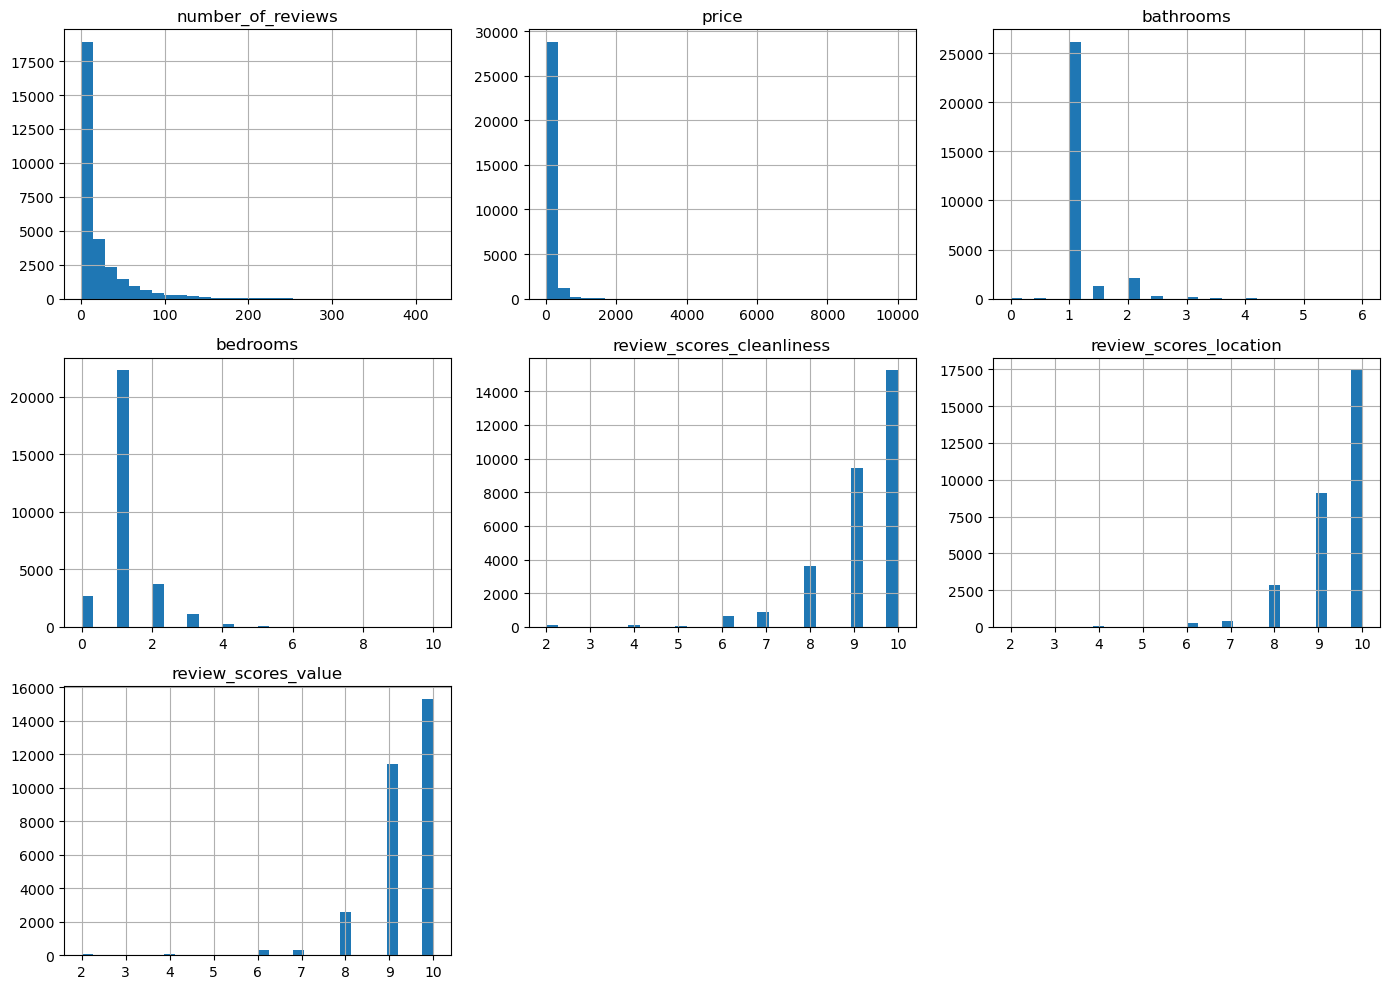

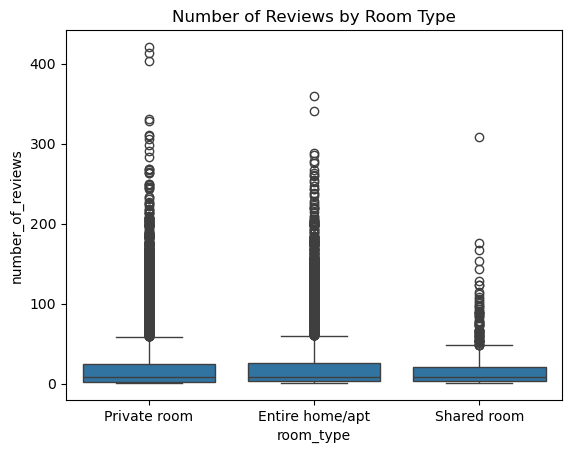

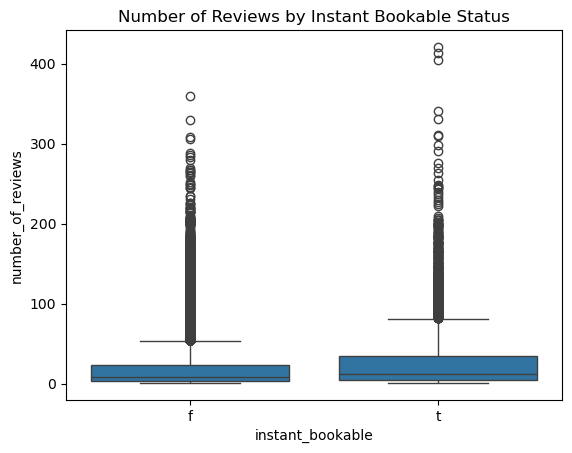

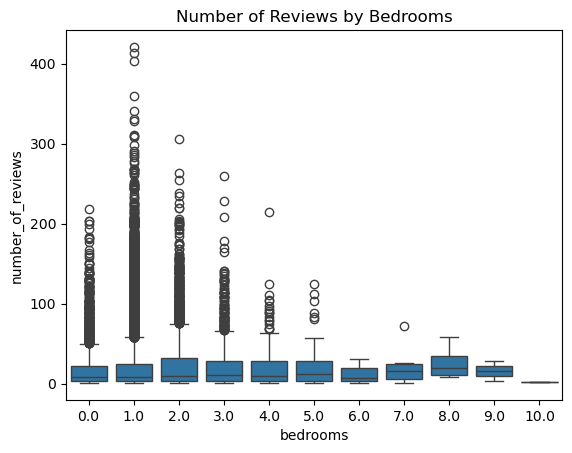

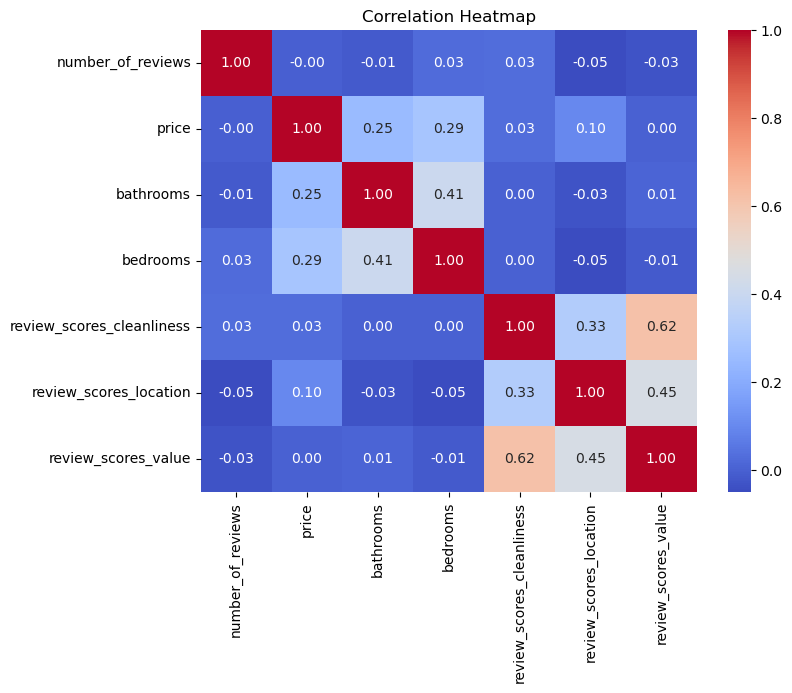

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical features
numeric_cols = ['number_of_reviews', 'price', 'bathrooms', 'bedrooms',
                'review_scores_cleanliness', 'review_scores_location', 'review_scores_value']
df[numeric_cols].hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()

# Boxplot of number_of_reviews by room_type
sns.boxplot(x='room_type', y='number_of_reviews', data=df)
plt.title('Number of Reviews by Room Type')
plt.show()

# Boxplot of number_of_reviews by instant_bookable
sns.boxplot(x='instant_bookable', y='number_of_reviews', data=df)
plt.title('Number of Reviews by Instant Bookable Status')
plt.show()

#Boxplot of number_of_reviews by bedrooms
sns.boxplot(x='bedrooms', y='number_of_reviews', data=df)
plt.title('Number of Reviews by Bedrooms')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


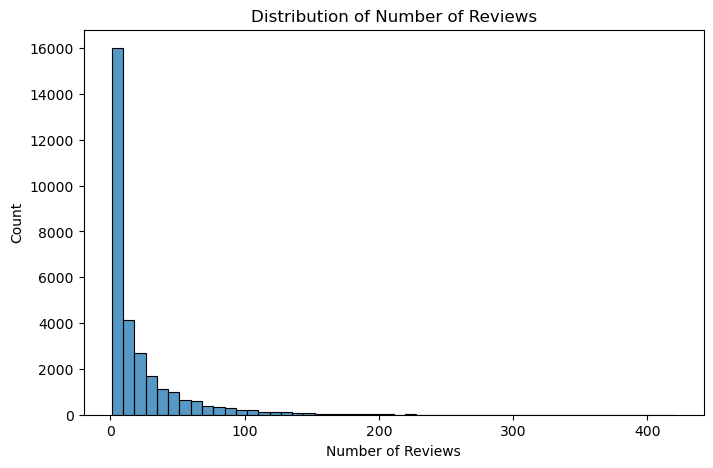

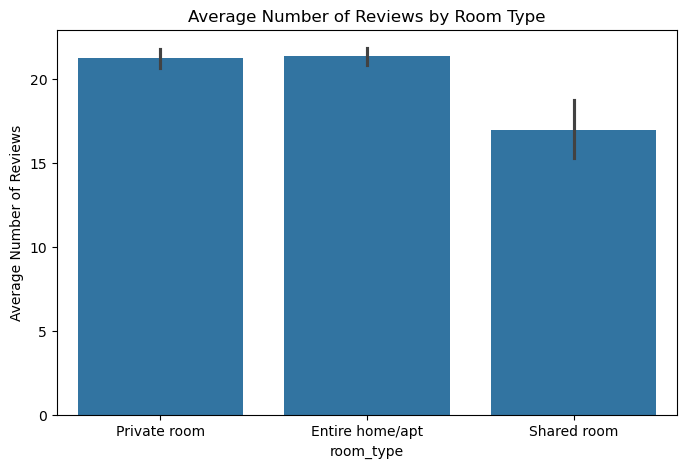

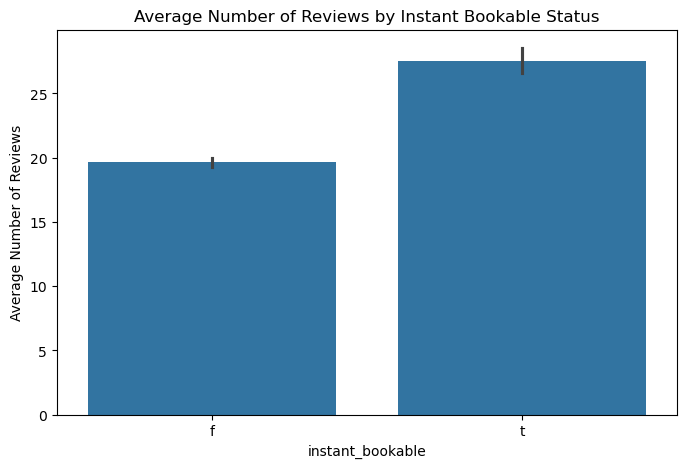

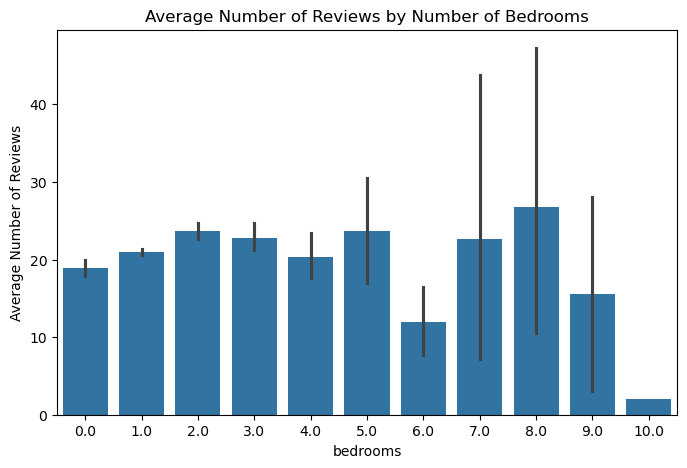

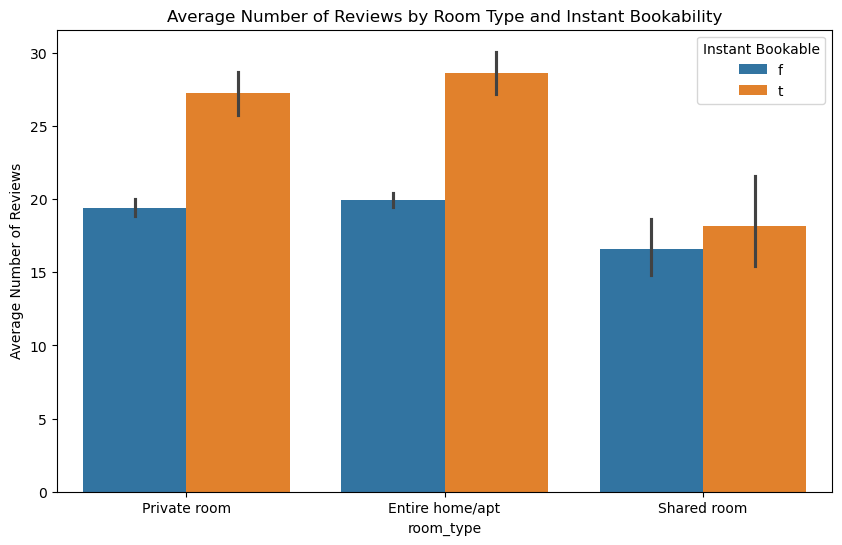

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot distribution of number_of_reviews
plt.figure(figsize=(8, 5))
sns.histplot(df['number_of_reviews'], bins=50, kde=False)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

# Average number of reviews by room_type
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='number_of_reviews', data=df, estimator=np.mean)
plt.title("Average Number of Reviews by Room Type")
plt.ylabel("Average Number of Reviews")
plt.show()

# Average number of reviews by instant_bookable
plt.figure(figsize=(8, 5))
sns.barplot(x='instant_bookable', y='number_of_reviews', data=df, estimator=np.mean)
plt.title("Average Number of Reviews by Instant Bookable Status")
plt.ylabel("Average Number of Reviews")
plt.show()

# Average number of reviews by number of bedrooms
plt.figure(figsize=(8, 5))
sns.barplot(x='bedrooms', y='number_of_reviews', data=df, estimator=np.mean)
plt.title("Average Number of Reviews by Number of Bedrooms")
plt.ylabel("Average Number of Reviews")
plt.show()

# Average number of reviews by room_type and instant_bookable (interaction)
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='number_of_reviews', hue='instant_bookable', data=df, estimator=np.mean)
plt.title("Average Number of Reviews by Room Type and Instant Bookability")
plt.ylabel("Average Number of Reviews")
plt.legend(title='Instant Bookable')
plt.show()


In [36]:
import pandas as pd
import statsmodels.api as sm

# Create dummy variables for room type
room_dummies = pd.get_dummies(df["room_type"], drop_first=True)

# Convert 'instant_bookable' to binary
df["instant_bookable"] = df["instant_bookable"].map({"t": 1, "f": 0})

# Construct the design matrix
X = pd.concat([
    df[["price", "days", "bathrooms", "bedrooms",
        "review_scores_cleanliness", "review_scores_location", "review_scores_value",
        "instant_bookable"]],
    room_dummies
], axis=1)

# Add intercept and ensure all values are float
X = sm.add_constant(X)
X = X.astype(float)

# Define the target variable
Y = df["number_of_reviews"]

# Fit Poisson regression model
poisson_model = sm.GLM(Y, X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Format output
summary_df = poisson_results.summary2().tables[1]
summary_df = summary_df.rename(columns={
    "Coef.": "Coefficient",
    "Std.Err.": "Std. Error",
    "P>|z|": "P-Value"
})

# Filter and round significant results
significant_results = summary_df[summary_df["P-Value"] < 0.05][["Coefficient", "Std. Error", "P-Value"]]
significant_results = significant_results.round(4)

print(significant_results)


                           Coefficient  Std. Error  P-Value
const                           3.4980      0.0161   0.0000
price                          -0.0000      0.0000   0.0315
days                            0.0001      0.0000   0.0000
bathrooms                      -0.1177      0.0037   0.0000
bedrooms                        0.0741      0.0020   0.0000
review_scores_cleanliness       0.1131      0.0015   0.0000
review_scores_location         -0.0769      0.0016   0.0000
review_scores_value            -0.0911      0.0018   0.0000
instant_bookable                0.3459      0.0029   0.0000
Private room                   -0.0105      0.0027   0.0001
Shared room                    -0.2463      0.0086   0.0000
